In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import missingno as msno
import re

ModuleNotFoundError: No module named 'missingno'

In [60]:
mds=pd.read_csv("MetObjects.csv",low_memory=False)

In [61]:
mds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484956 entries, 0 to 484955
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Object Number            484956 non-null  object 
 1   Is Highlight             484956 non-null  bool   
 2   Is Timeline Work         484956 non-null  bool   
 3   Is Public Domain         484956 non-null  bool   
 4   Object ID                484956 non-null  int64  
 5   Gallery Number           49541 non-null   object 
 6   Department               484956 non-null  object 
 7   AccessionYear            481094 non-null  object 
 8   Object Name              482690 non-null  object 
 9   Title                    456153 non-null  object 
 10  Culture                  208190 non-null  object 
 11  Period                   91143 non-null   object 
 12  Dynasty                  23201 non-null   object 
 13  Reign                    11236 non-null   object 
 14  Port

In [62]:
mds.head()

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979,Coin,One-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,67.265.9,False,False,False,3,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
3,67.265.10,False,False,False,4,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
4,67.265.11,False,False,False,5,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


In [63]:
mds.tail()

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
484951,55.621.134,False,False,False,900605,NaN,Drawings and Prints,1955,Print,Holiday Card,...,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
484952,1977.646,False,False,False,900606,NaN,Drawings and Prints,1977,Print,Brooklyn Local,...,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
484953,33.40.1,False,False,False,900633,NaN,Drawings and Prints,1933,Print,Yesterday and Today,...,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
484954,170.1 C42,True,False,False,900717,NaN,The Libraries,NaN,NaN,"De la loi du contraste simultané des couleurs,...",...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
484955,17.3.3457,False,False,False,900748,NaN,Drawings and Prints,1917,Print,Madison Square - Fifth Avenue and Broadway at ...,...,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


In [64]:
mds.iloc[0:50,0:10]

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979,Coin,One-dollar Liberty Head Coin
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin
2,67.265.9,False,False,False,3,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin
3,67.265.10,False,False,False,4,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin
4,67.265.11,False,False,False,5,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin
5,67.265.12,False,False,False,6,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin
6,67.265.13,False,False,False,7,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin
7,67.265.14,False,False,False,8,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin
8,67.265.15,False,False,False,9,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin
9,1979.486.3,False,False,False,10,NaN,The American Wing,1979,Coin,Two-and-a-half-dollar Indian Head Coin


In [65]:
mds["Credit Year"]=mds["Credit Line"].str.split(",").str[1]
print(mds["Credit Year"])

0          1979
1          1980
2          1967
3          1967
4          1967
          ...  
484951     1955
484952     1977
484953     1933
484954      NaN
484955     1917
Name: Credit Year, Length: 484956, dtype: object


In [66]:
mds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484956 entries, 0 to 484955
Data columns (total 55 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Object Number            484956 non-null  object 
 1   Is Highlight             484956 non-null  bool   
 2   Is Timeline Work         484956 non-null  bool   
 3   Is Public Domain         484956 non-null  bool   
 4   Object ID                484956 non-null  int64  
 5   Gallery Number           49541 non-null   object 
 6   Department               484956 non-null  object 
 7   AccessionYear            481094 non-null  object 
 8   Object Name              482690 non-null  object 
 9   Title                    456153 non-null  object 
 10  Culture                  208190 non-null  object 
 11  Period                   91143 non-null   object 
 12  Dynasty                  23201 non-null   object 
 13  Reign                    11236 non-null   object 
 14  Port

In [67]:
mds.dtypes

Object Number               object
Is Highlight                  bool
Is Timeline Work              bool
Is Public Domain              bool
Object ID                    int64
Gallery Number              object
Department                  object
AccessionYear               object
Object Name                 object
Title                       object
Culture                     object
Period                      object
Dynasty                     object
Reign                       object
Portfolio                   object
Constituent ID              object
Artist Role                 object
Artist Prefix               object
Artist Display Name         object
Artist Display Bio          object
Artist Suffix               object
Artist Alpha Sort           object
Artist Nationality          object
Artist Begin Date           object
Artist End Date             object
Artist Gender               object
Artist ULAN URL             object
Artist Wikidata URL         object
Object Date         

In [69]:
mds["Gallery Number"].astype("int")

ValueError: cannot convert float NaN to integer

In [70]:
mds["Gallery Number"].isnull().sum()

435415

In [71]:
mds["Gallery Number"]=mds["Gallery Number"].replace(np.nan,999999)

In [72]:
mds[mds["Gallery Number"].str.contains("\D") == True]["Gallery Number"]

10164       in Great Hall
102780    Petrie Ct. Café
103766    Petrie Ct. Café
107259    Petrie Ct. Café
112051    Petrie Ct. Café
112301    Petrie Ct. Café
112305    Petrie Ct. Café
114849    Petrie Ct. Café
115170      in Great Hall
116179    Petrie Ct. Café
117308    Petrie Ct. Café
323920    on Fifth Avenue
483895     Watson Library
483899     Watson Library
483901     Watson Library
483903     Watson Library
483905     Watson Library
483909     Watson Library
483910     Watson Library
483913     Watson Library
483915     Watson Library
484082     Watson Library
484089     Watson Library
484093     Watson Library
484097     Watson Library
484099     Watson Library
484101     Watson Library
484102     Watson Library
484103     Watson Library
484104     Watson Library
484105     Watson Library
484175     Watson Library
484176     Watson Library
484177     Watson Library
484181     Watson Library
484183     Watson Library
484194     Watson Library
Name: Gallery Number, dtype: object

In [73]:
gallery_strings={"in Great Hall":np.nan, 
                 "Petrie Ct. Café":np.nan,
                "on Fifth Avenue":np.nan,
                "Watson Library":np.nan}

In [74]:
mds["Gallery Number"]=mds["Gallery Number"].map(gallery_strings)
mds["Gallery Number"] = mds["Gallery Number"].replace(np.nan, 9999999)

In [75]:
mds["Gallery Number"] = mds["Gallery Number"].astype("int")
 
mds["Gallery Number"].dtypes

dtype('int64')

In [76]:
mds["Gallery Number"] = mds["Gallery Number"].replace(9999999, np.nan)
 
mds["Gallery Number"].isnull().sum()

484956

In [77]:
mds["Country"].nunique()

967

In [78]:
mds["Country"].value_counts()[120:150]

Country
India|Egypt                    19
Croatia (former Yugoslavia)    18
Northwestern Iran              18
Yemen                          18
Iran or Central Asia           18
Nauru                          18
Portugal                       17
Norway                         17
Greece                         17
England|Ireland                17
Ivory Coast                    16
Armenia                        16
Guinea                         16
Western Iran                   15
Syria|Egypt                    15
Argentina                      15
Republic of Congo              15
United States of America       15
Côte d'Ivoire or Liberia       15
Iran (Persia)                  15
Republic of the Philippines    15
Turkmenistan                   15
Eastern Islamic lands          15
USA                            15
Scotland                       14
Northwest Iran                 14
Nepal                          14
Arabia                         13
Republic of Cameroon           13
Niger 

In [79]:
lower_country=mds[mds["Country"].str.islower()==True]
lower_country["Country"].value_counts()

Country
iran     4
india    1
italy    1
Name: count, dtype: int64

In [80]:
mds["Country"]=mds["Country"].str.title()
lower_country["Country"].value_counts()

Country
iran     4
india    1
italy    1
Name: count, dtype: int64

In [81]:
lower_country["Country"].value_counts()

Country
iran     4
india    1
italy    1
Name: count, dtype: int64

In [82]:
lower_country=mds[mds["Country"].str.islower()==True]
lower_country["Country"].value_counts()

Series([], Name: count, dtype: int64)

In [83]:
bosluk=mds[mds["Country"].str.startswith(" ",0)==True]
bosluk["Country"].value_counts()

Series([], Name: count, dtype: int64)

<Axes: >

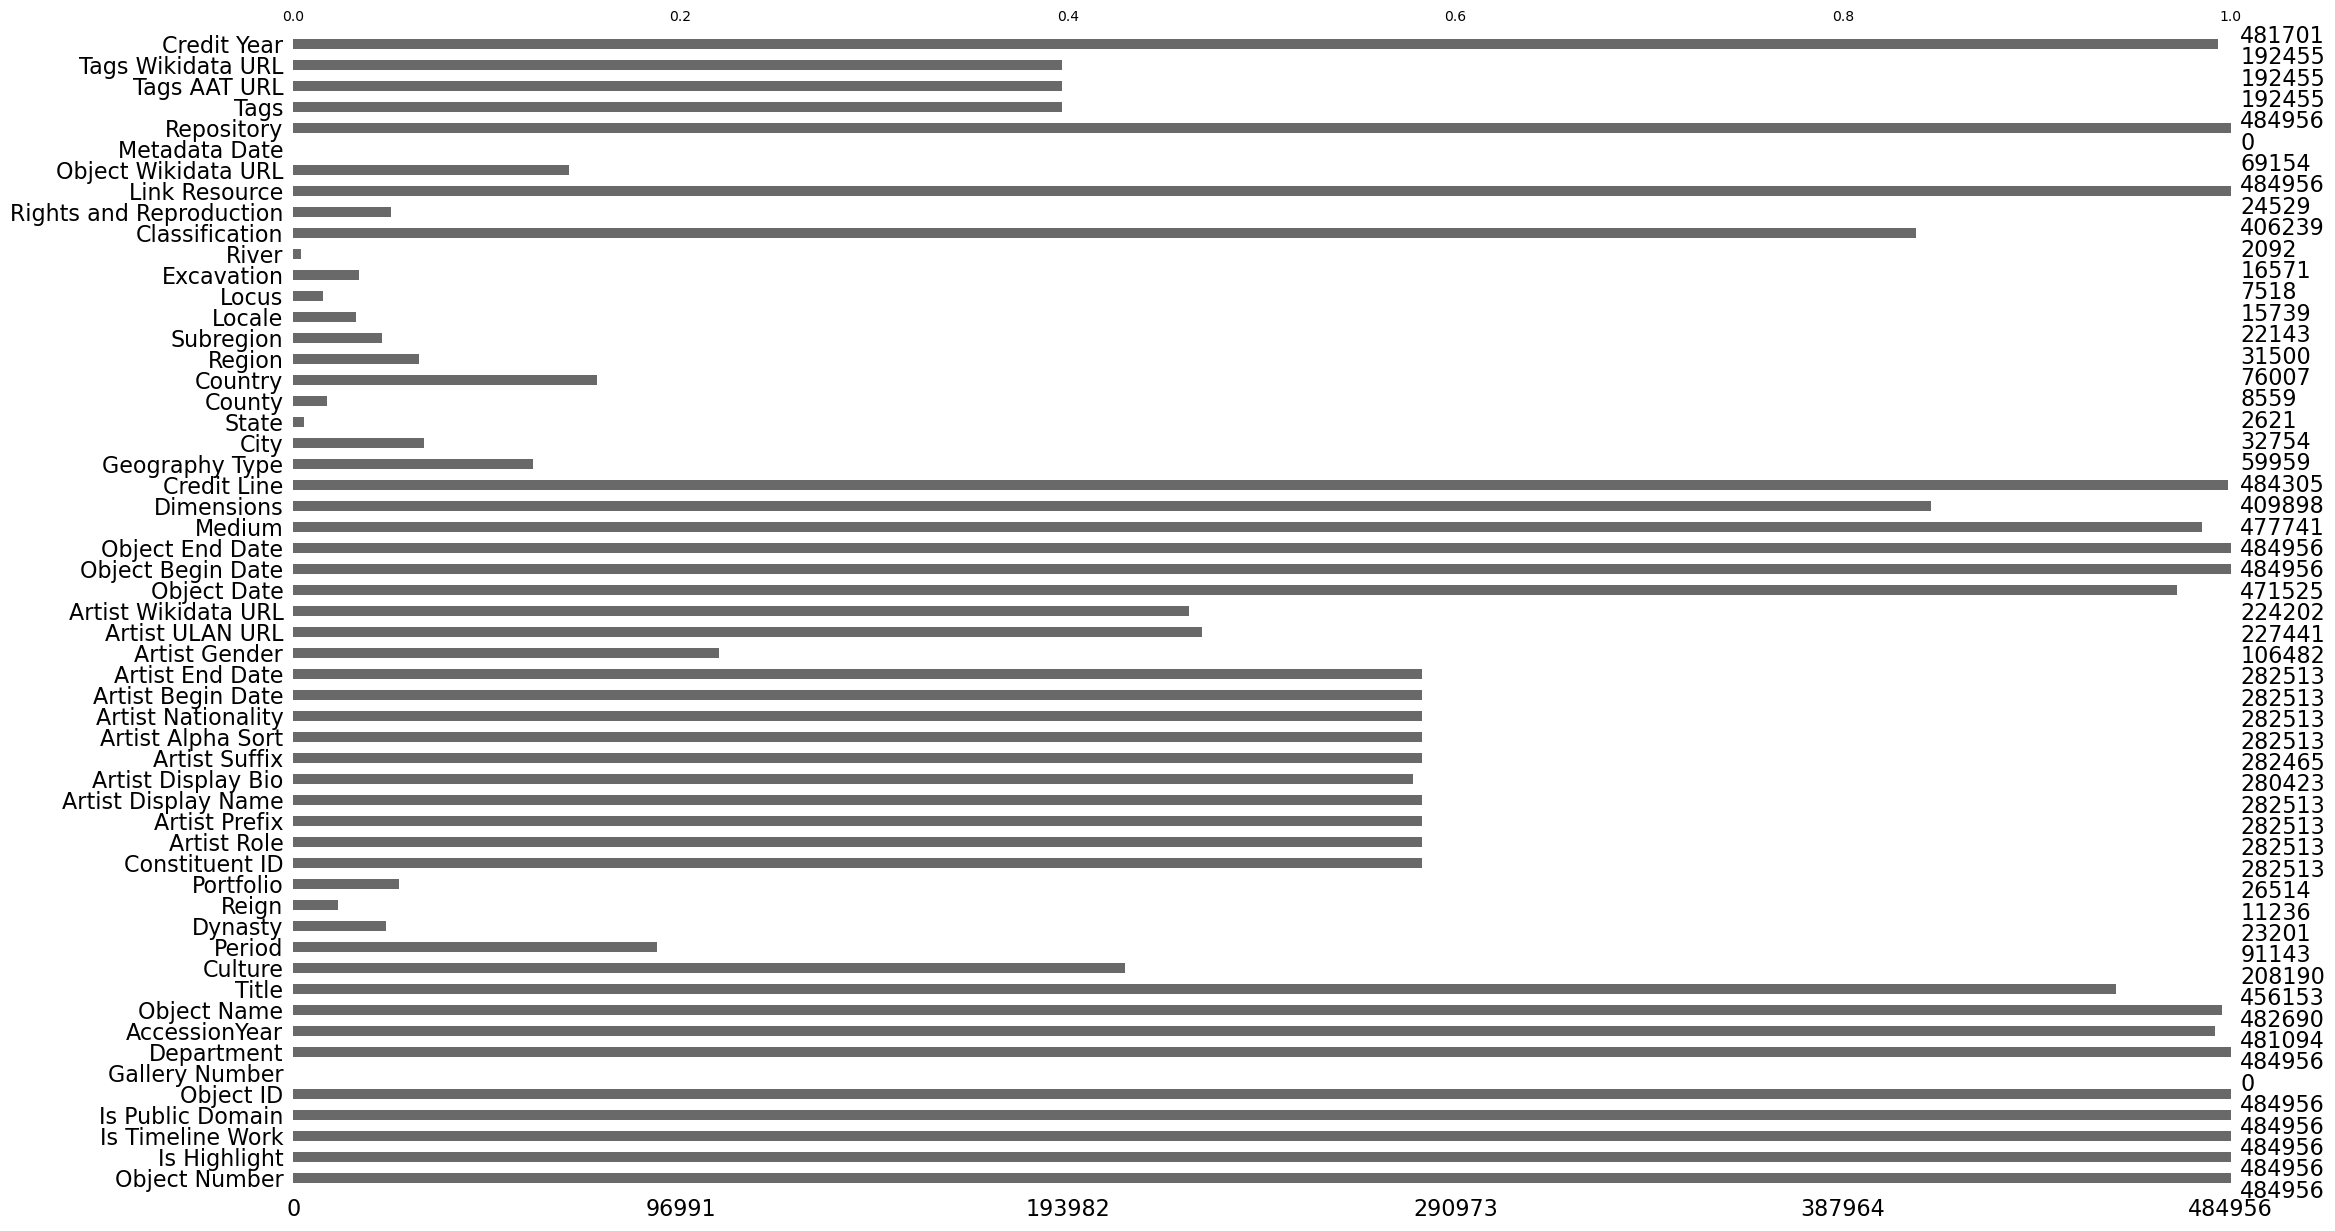

In [84]:
msno.bar(mds)

<Axes: >

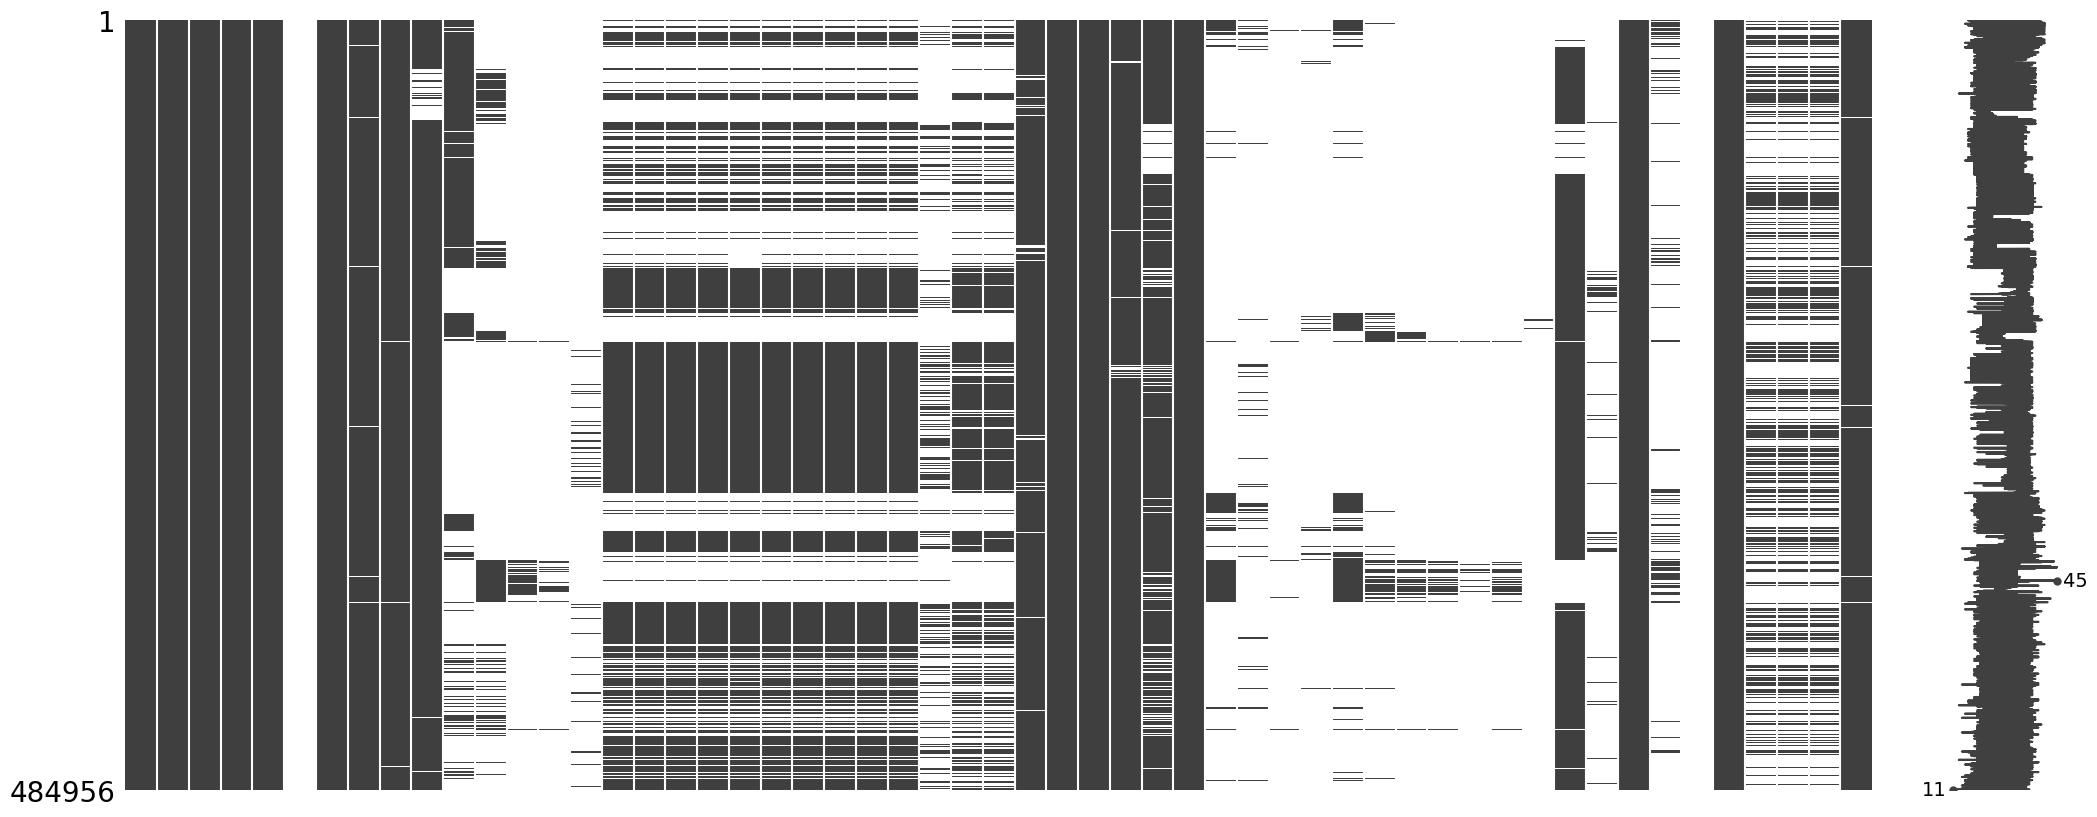

In [85]:
msno.matrix(mds)